In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dongsi.csv to Dongsi.csv


In [3]:
data=read_csv("Dongsi.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [4]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Dongsi.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [5]:
dataset.drop("No", axis=1, inplace=True)

In [6]:
dataset=dataset.fillna(method="pad")

In [7]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [8]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,86.310293,110.584283,18.527338,52.194294,1363.244439,57.525669,13.668746,1012.551858,2.445117,0.063983,1.860712
std,86.337389,98.181732,22.974084,34.475533,1201.231679,58.674161,11.460066,10.266719,13.812242,0.786059,1.280429
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,23.000000,38.000000,3.427200,26.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,61.000000,87.000000,10.000000,46.000000,1000.000000,44.553600,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,120.000000,151.000000,24.000000,72.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [9]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

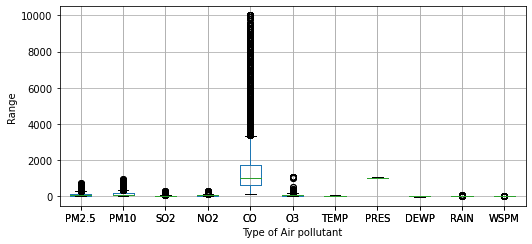

In [10]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

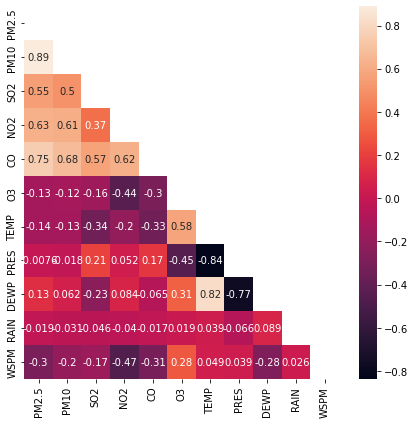

In [11]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Dongsiheat.jpg', dpi=400) 
# displaying heatmap
plt.show()

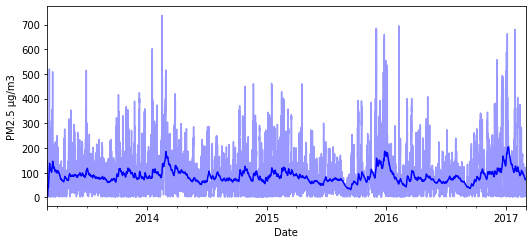

In [12]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./dongsi.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
values

array([[ 4. ,  4. ,  4. , ...,  0. ,  6. ,  4.4],
       [ 8. ,  8. ,  4. , ...,  0. ,  3. ,  4.7],
       [ 7. ,  7. ,  5. , ...,  0. ,  6. ,  5.6],
       ...,
       [16. , 37. , 10. , ...,  0. ,  7. ,  1.1],
       [21. , 44. , 12. , ...,  0. ,  6. ,  1.2],
       [19. , 31. , 10. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(GRU(units = 50)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath="/save.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
tb = TensorBoard('logs')
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,callbacks=[mcp,rlr],validation_data=(X_test, Y_test), verbose=1, shuffle=False)


Epoch 1/100
411/411 [==============================] - ETA: 0s - loss: 0.0033
Epoch 1: val_loss improved from inf to 0.00206, saving model to /save.h5
411/411 [==============================] - 31s 36ms/step - loss: 0.0033 - val_loss: 0.0021 - lr: 0.0010
Epoch 2/100
411/411 [==============================] - ETA: 0s - loss: 0.0020
Epoch 2: val_loss improved from 0.00206 to 0.00188, saving model to /save.h5
411/411 [==============================] - 14s 33ms/step - loss: 0.0020 - val_loss: 0.0019 - lr: 0.0010
Epoch 3/100
410/411 [============================>.] - ETA: 0s - loss: 0.0016
Epoch 3: val_loss improved from 0.00188 to 0.00175, saving model to /save.h5
411/411 [==============================] - 12s 28ms/step - loss: 0.0016 - val_loss: 0.0017 - lr: 0.0010
Epoch 4/100
411/411 [==============================] - ETA: 0s - loss: 0.0015
Epoch 4: val_loss improved from 0.00175 to 0.00147, saving model to /save.h5
411/411 [==============================] - 12s 28ms/step - loss: 0.0015 

In [ ]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

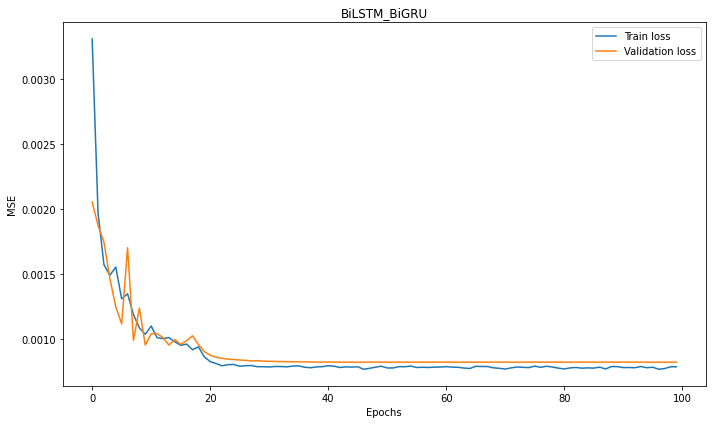

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 3s 10ms/step
RMSE at 40 = 8.659033
RMAE at 40 = 2.7160518
MAPE at 40 = 1.755566
R2 at 40 = 0.6753727984530145
2/2 [==============================] - 0s 9ms/step
RMSE at 45 = 8.371295
RMAE at 45 = 2.6708527
MAPE at 45 = 1.5666556
R2 at 45 = 0.9166778214856097
2/2 [==============================] - 0s 9ms/step
RMSE at 50 = 9.262434
RMAE at 50 = 2.747322
MAPE at 50 = 1.4203418
R2 at 50 = 0.9492055117906292
2/2 [==============================] - 0s 9ms/step
RMSE at 55 = 9.641431
RMAE at 55 = 2.8141522
MAPE at 55 = 1.3026459
R2 at 55 = 0.9512266232082295
2/2 [==============================] - 0s 10ms/step
RMSE at 60 = 9.519875
RMAE at 60 = 2.7900987
MAPE at 60 = 1.201121
R2 at 60 = 0.9542703166301855
3/3 [==============================] - 0s 7ms/step
RMSE at 65 = 9.692788
RMAE at 65 = 2.8199432
MAPE at 65 = 1.1226197
R2 at 65 = 0.9516706222307082
3/3 [==============================] - 0s 7ms/step
RMSE at 70 = 11.2537365
RMAE at 70 = 2.9285085
MAPE at 7

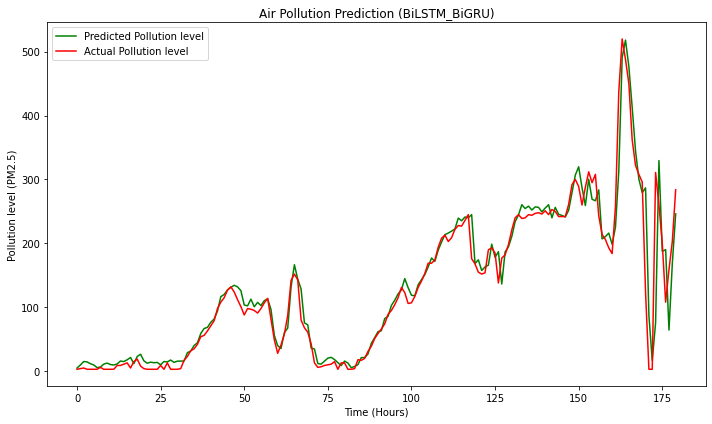

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [ ]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_BiLSTMBiGRU.csv', Y_test, delimiter=',')